In [29]:
import numpy as np
import pandas as pd

In [30]:
data = pd.read_excel('Online Retail.xlsx')

In [31]:
data.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom

In [32]:
data.StockCode.value_counts()

85123A    2313
22423     2203
85099B    2159
47566     1727
20725     1639
          ... 
46776f       1
84247C       1
84971L       1
84612B       1
21854        1
Name: StockCode, Length: 4070, dtype: int64

### Stage 1

#### 1. How many unique billing made?

In [33]:
data.InvoiceNo.nunique()

25900

#### 2. How many unique customer are there ?

In [34]:
data.CustomerID.nunique()

4372

#### 3. Which day of week most sale is done?

In [51]:
def getDayOfWeek(x):
    #print(x)
    return x.weekday()

def getDay(x):
    day = ['MONDAY', 'TUESDAY', 'WEDNESDAY', 'THURSDAY', 'FRIDAY', 'SATURDAY', 'SUNDAY']
    return day[x]

data['DAY_OF_WEEK'] = data['InvoiceDate'].apply(getDayOfWeek)

#Printing the most frequent day
data.groupby('DAY_OF_WEEK').Quantity.sum()

DAY_OF_WEEK
0     815354
1     961543
2     969558
3    1167823
4     794440
6     467732
Name: Quantity, dtype: int64

In [53]:
print('Highest Sale is on:', getDay(3))

Highest Sale is on: THURSDAY


#### 4. What is the most popular product?

In [49]:
data[data['StockCode']=='85123A']

InvoiceNo StockCode                         Description  Quantity  \
0         536365    85123A  WHITE HANGING HEART T-LIGHT HOLDER         6   
49        536373    85123A  WHITE HANGING HEART T-LIGHT HOLDER         6   
66        536375    85123A  WHITE HANGING HEART T-LIGHT HOLDER         6   
220       536390    85123A  WHITE HANGING HEART T-LIGHT HOLDER        64   
262       536394    85123A  WHITE HANGING HEART T-LIGHT HOLDER        32   
...          ...       ...                                 ...       ...   
539342    581439    85123A  CREAM HANGING HEART T-LIGHT HOLDER         1   
539979    581452    85123A  WHITE HANGING HEART T-LIGHT HOLDER        32   
540217    581472    85123A  WHITE HANGING HEART T-LIGHT HOLDER         6   
540837    581492    85123A  CREAM HANGING HEART T-LIGHT HOLDER         3   
541639    581538    85123A  CREAM HANGING HEART T-LIGHT HOLDER         1   

               InvoiceDate  UnitPrice  CustomerID         Country  
0      2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
49     2010-12-01 09:02:00       2.55     17850.0  United Kingdom  
66     2010-12-01 09:32:00       2.55     17850.0  United Kingdom  
220    2010-12-01 10:19:00       2.55     17511.0  United Kingdom  
262    2010-12-01 10:39:00       2.55     13408.0  United Kingdom  
...                    ...        ...         ...             ...  
539342 2011-12-08 16:30:00       5.79         NaN  United Kingdom  
539979 2011-12-08 18:03:00       2.55     17675.0  United Kingdom  
540217 2011-12-08 19:55:00       2.95     15796.0  United Kingdom  
540837 2011-12-09 10:03:00       5.79         NaN  United Kingdom  
541639 2011-12-09 11:34:00       2.95     14446.0  United Kingdom  

[2313 rows x 8 columns]

In [64]:
top_selling_product = data.groupby('StockCode').Quantity.sum().sort_values(ascending=False)[:5]

In [66]:
#Printing the description of that product
data[data['StockCode']==top_selling_product.index[0]].iloc[0]['Description']

'SMALL POPCORN HOLDER'

In [69]:
for prod in top_selling_product.index:
    print(data[data.StockCode==prod].Description.unique())

['SMALL POPCORN HOLDER' 'POPCORN HOLDER']
['WORLD WAR 2 GLIDERS ASSTD DESIGNS']
['JUMBO BAG RED RETROSPOT']
['WHITE HANGING HEART T-LIGHT HOLDER' '?' 'wrongly marked carton 22804'
 'CREAM HANGING HEART T-LIGHT HOLDER']
['ASSORTED COLOUR BIRD ORNAMENT' 'damaged']


#### 5. In which country you need to open store?

In [71]:
data['TotalPrice'] = data['UnitPrice'] * data['Quantity']

In [72]:
#Country which is at 0th position in value_counts() have highest number of sale
data.groupby('Country').TotalPrice.sum().sort_values(ascending=False)[:5]

Country
United Kingdom    8.187806e+06
Netherlands       2.846615e+05
EIRE              2.632768e+05
Germany           2.216982e+05
France            1.974039e+05
Name: TotalPrice, dtype: float64

#### 6. Plot the highest sales 

In [73]:
index = ['SMALL POPCORN HOLDER', 'WORLD WAR 2 GLIDERS ASSTD DESIGNS', 'JUMBO BAG RED RETROSPOT',
        'WHITE HANGING HEART T-LIGHT HOLDER', 'ASSORTED COLOUR BIRD ORNAMENT']

top_selling_product.index = index

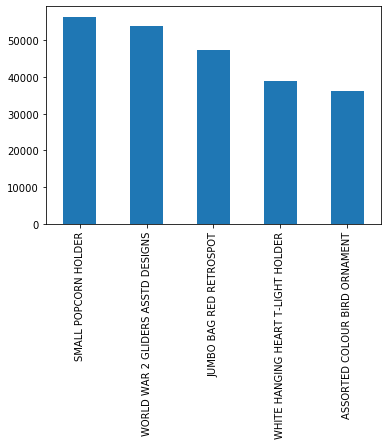

In [74]:
top_selling_product.plot.bar()

### Stage 2

#### 1. Relation between country weekday and revenue

In [75]:
pd.pivot_table(data[['Country', 'DAY_OF_WEEK', 'TotalPrice']])

ValueError: No group keys passed!